In [83]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import solve_ivp

L = 0.06
g = 10
m = 0.0064
D = 0.04
K = 0.944

def modelo(t,lista):
    x = lista[0]
    y = lista[1]
    vx = lista[2]
    vy = lista[3]
    v = sqrt( vx**2 + vy**2 )
    cosseno = ( L - y ) / L
    seno = - x / L
    T = m * g * cosseno + m * v**2 / L
    dxdt = vx
    dydt = vy
    dvxdt = T / m * seno
    dvydt = - g + T / m * cosseno
    
    return [ dxdt , dydt , dvxdt , dvydt ]
    
def cond_parada(t, lista):
    return lista[0]

cond_parada.terminal = True

def encontra_t_max(lista_t,lista_y):
    ymax = lista_y[0]
    tmax = 0
    for i in range(len(lista_t)):
        if lista_y[i]>ymax:
            ymax = lista_y[i]
            tmax = lista_t[i]
    return tmax


In [84]:
# calculos aleatórios
L = 0.06
x_0 = -7.344e-2
y_0 = 2.725e-2

sen = y_0/L
cos = sqrt(1 - sen**2)

print("o cosseno é {}".format(cos))
print("o seno é {}".format(sen))

o cosseno é 0.8909167407164874
o seno é 0.45416666666666666


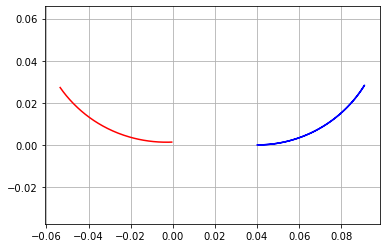

In [85]:
# ESSE TRECHO É SÓ PARA TESTAR COM UMA EXECUÇÃO DE CADA LADO
tf = 2
dt = 1e-3
t_span = ( 0 , tf )
lista_t = np.arange( 0, tf, dt)

CI = [ -L*cos , L*sen , 0 , 0 ]

solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

lista_x = solucao.y[ 0 , : ]
lista_y = solucao.y[ 1 , : ]
lista_vx = solucao.y[ 2 , : ]

plt.plot( lista_x , lista_y , 'r')

CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

lista_x = solucao.y[ 0 , : ] + D  # D FOI SOMADO PARA REPRESENTAR A POSIÇÃO DA BOLINHA DA DIREITA
lista_y = solucao.y[ 1 , : ]

plt.plot( lista_x , lista_y, 'b')
plt.grid()
plt.axis("equal")
plt.show()

-0.05345500444298924
0.03225


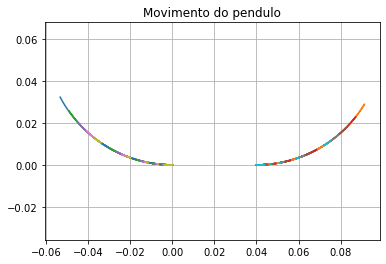

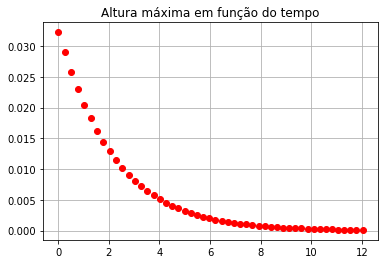

In [86]:
lista_ymax = []
lista_t_ymax = []
tfinal = 0

CI = [ -L*cos , L*sen+0.005 , 0 , 0 ]
print (CI[0])
print(CI[1])
for i in range(50):

    if i%2 == 0 :

        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ]
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax.append(max(lista_y))
        lista_t_ymax.append(encontra_t_max( solucao.t , lista_y ) + tfinal)

        tfinal = tfinal + solucao.t[-1]
        
        plt.plot( lista_x , lista_y ) 

        CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]
        
    else:
    
        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ] + D
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax.append(max(lista_y))
        lista_t_ymax.append(encontra_t_max( solucao.t , lista_y ) + tfinal)

        tfinal = tfinal + solucao.t[-1]
        
        plt.plot( lista_x , lista_y ) 
        
        CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]
        
plt.axis("equal")
plt.title("Movimento do pendulo")
plt.grid(True)
plt.show() 


plt.plot( lista_t_ymax , lista_ymax, 'ro' )
plt.title("Altura máxima em função do tempo")
plt.grid(True)
plt.show() 


# validação do modelo

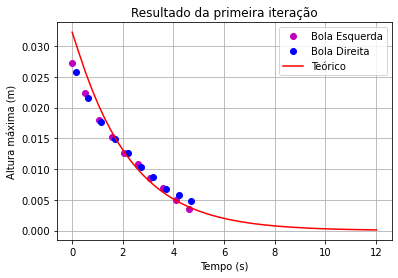

In [87]:
import pandas

colunas = ["t","x","y"] #,"vx","vy"]
datae = pandas.read_csv("Dados_MassA.csv",names = colunas)
datad = pandas.read_csv("Dados_MassB.csv",names = colunas)

te = datae.t.tolist()
# ajustar a origem no eixo do tempo

t_e = []
for t in te:
    t_e.append(t - 8.133)
    
xe = datae.x.tolist()
ye = datae.y.tolist()
# VAMOS CALCULAR A ALTURA MÁXIMA DE CADA COLISÃO
y_e_max = [ye[0],ye[33],ye[66],ye[98],ye[128],ye[161],ye[193],ye[224],ye[258],ye[289]]  
t_e_ok = [t_e[0],t_e[33],t_e[66],t_e[98],t_e[128],t_e[161],t_e[193],t_e[224],t_e[258],t_e[289]]

# ajustar a origem no eixo do tempo para o lado direito
td = datad.t.tolist()

t_d = []
for t in td:
    t_d.append(t - 8.275)
        
xd = datad.x.tolist()
yd = datad.y.tolist()
y_d_max = [yd[18],yd[50],yd[82],yd[115],yd[147],yd[179],yd[210],yd[240],yd[273],yd[305]]
t_d_ok = [t_d[18],t_d[50],t_d[82],t_d[115],t_d[147],t_d[179],t_d[210],t_d[240],t_d[273],t_d[305]]

plt.title("Resultado da primeira iteração")
plt.plot(t_e_ok,y_e_max,"mo", label = "Bola Esquerda")
plt.plot(t_d_ok,y_d_max,"bo", label = "Bola Direita")
plt.plot(lista_t_ymax , lista_ymax, 'r', label = "Teórico")
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.show()



In [88]:
# variando o valor da contante K

lista_ymax_1 = []
lista_t_ymax_1 = []
tfinal_1 = 0

# criando um lista de k para serem analizados

lisK = np.arange(0.9,0.95,0.05)

for K in lisK:
    
    CI = [ -L*cos , L*sen , 0 , 0 ]

    for i in range(50):

        if i%2 == 0 :

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ]
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

        else:

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ] + D
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]

